Mohit Baghel  
Topic-**Bank Loan Default Prediction**

In [1]:
# If using Colab, run this cell once
!pip -q install imbalanced-learn xgboost

import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
# Replace with your dataset file path
data = pd.read_csv("/content/bank_loan_default.csv")
print(data.head())
print(data.info())
print(data.describe())


   loan_id  age  income  loan_amount       term  credit_score  \
0        1   25   35000         5000  36 months           680   
1        2   34   48000        12000  60 months           720   
2        3   45   60000        20000  36 months           650   
3        4   23   28000         4000  36 months           600   
4        5   52   75000        25000  60 months           780   

  employment_status  default  
0          Employed        0  
1     Self-employed        0  
2          Employed        1  
3        Unemployed        1  
4          Employed        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_id            20 non-null     int64 
 1   age                20 non-null     int64 
 2   income             20 non-null     int64 
 3   loan_amount        20 non-null     int64 
 4   term               20 non-null    

In [26]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [27]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070

Confusion Matrix:
 [[45059   111]
 [ 5716   184]]

Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070

Confusion Matrix:
 [[45036   134]
 [ 5641   259]]


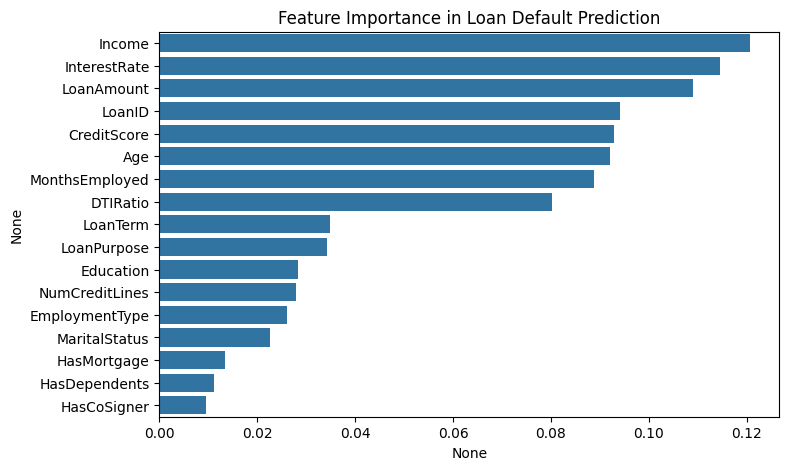

In [28]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance in Loan Default Prediction")
plt.show()


In [ ]:
# Fill missing values
data = data.fillna(method='ffill')

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Features and Target
X = data.drop('Loan_Status', axis=1)   # Assuming 'Loan_Status' is target (1=default,0=no)
y = data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
